In [1]:
import os
os.chdir("C:/Users/coldp/바탕 화면/딥러닝/데이터분석_프로젝트/빅콘/05_물류데이터(CJ올리브네트웍스)")

In [2]:
import pandas as pd
import numpy as np

In [3]:
logistics = pd.read_csv('2020 빅콘테스트_CJ올리브네트웍스_제공DB.csv',thousands = ',')

## 데이터 기초 정보 확인

In [17]:
logistics.head(10)

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
5,190201,도서/음반,12,서울특별시,11,중구,14,회현동,540,25
6,190201,가구/인테리어,10,대구광역시,27,수성구,26,범어1동,510,6
7,190201,디지털/가전,13,서울특별시,11,중구,14,황학동,670,14
8,190201,가구/인테리어,10,대구광역시,27,중구,11,남산4동,670,2
9,190201,디지털/가전,13,대구광역시,27,중구,11,대신동,595,7


In [5]:
logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DL_YMD         156571 non-null  int64 
 1   DL_GD_LCLS_NM  156571 non-null  object
 2   DL_GD_LCLS_CD  156571 non-null  int64 
 3   CTPV_NM        156571 non-null  object
 4   CTPV_CD        156571 non-null  int64 
 5   CTGG_NM        156571 non-null  object
 6   CTGG_CD        156571 non-null  int64 
 7   HDNG_NM        156571 non-null  object
 8   HDNG_CD        156571 non-null  int64 
 9    INVC_CONT     156571 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 11.9+ MB


In [6]:
logistics['DL_YMD'].tolist()[0]

190201

--> 날짜는 object로 아래와 같이 변경  
--> 또한 추후 활용하기 위해 아래와 같이  연, 월을 분리 함. 

In [4]:
logistics['DL_YMD'] = logistics['DL_YMD'].astype('str')

logistics['Y'] = logistics['DL_YMD'].apply(lambda x: x[:2])
logistics['M'] = logistics['DL_YMD'].apply(lambda x: x[2:4])
logistics['YM'] = logistics['DL_YMD'].apply(lambda x: x[:4])

In [8]:
logistics.columns

Index(['DL_YMD', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'CTPV_NM', 'CTPV_CD',
       'CTGG_NM', 'CTGG_CD', 'HDNG_NM', 'HDNG_CD', ' INVC_CONT ', 'Y', 'M',
       'YM'],
      dtype='object')

--> INVC_COUNT 컬럼이 '` INVC_CONT `'로 잘못 붙어있는 것을 발견. 따라서 아래와 같이 고쳐 줌.

In [5]:
logistics.columns = ['DL_YMD', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'CTPV_NM', 'CTPV_CD', 'CTGG_NM', 'CTGG_CD', 'HDNG_NM', 'HDNG_CD', 'INVC_CONT','Y','M','YM']

In [10]:
print(logistics['CTPV_NM'].unique(),'\n')
print(logistics['CTGG_NM'].unique(),'\n')
print(logistics['HDNG_NM'].unique(),'\n')
print(logistics['DL_GD_LCLS_NM'].unique(),'\n')
print(logistics['DL_YMD'].unique())

['서울특별시' '대구광역시'] 

['중구' '수성구' '노원구'] 

['동화동' '신당동' '성내1동' '남산2동' '고산3동' '회현동' '범어1동' '황학동' '남산4동' '대신동' '파동'
 '지산2동' '만촌2동' '약수동' '청구동' '상계10동' '상계8동' '상계9동' '지산1동' '월계1동' '대봉2동' '명동'
 '공릉1동' '월계3동' '하계2동' '성내2동' '성내3동' '수성4가동' '범어3동' '삼덕동' '공릉2동' '남산1동'
 '만촌3동' '중동' '동인동' '신당제5동' '고산1동' '을지로동' '상동' '하계1동' '범어4동' '소공동' '범어2동'
 '범물2동' '상계6.7동' '수성2.3가동' '월계2동' '상계1동' '중계본동' '다산동' '만촌1동' '상계5동' '범물1동'
 '중계2.3동' '중계4동' '중계1동' '황금1동' '광희동' '상계2동' '수성1가동' '황금2동' '고산2동' '두산동'
 '상계3.4동' '필동' '중림동' '장충동' '남산3동' '대봉1동'] 

['도서/음반' '가구/인테리어' '디지털/가전' '스포츠/레저' '패션잡화' '식품' '생활건강' '패션의류' '화장품/미용'
 '출산/육아'] 

['190201' '190202' '190203' '190204' '190205' '190206' '190207' '190208'
 '190209' '190210' '190211' '190212' '190213' '190214' '190215' '190216'
 '190217' '190218' '190219' '190220' '190221' '190222' '190223' '190224'
 '190225' '190226' '190227' '190228' '190301' '190302' '190303' '190304'
 '190305' '190306' '190307' '190308' '190309' '190310' '190311' '190312'
 '190313' '190314' '190315' '

--> 컬럼별 성질 확인  
--> 확인 결과, 특이 컬럼은 CTGG_NM(시군구명), DL_YMD(배송년월일)임.  
--> CTGG_NM의 특이점은 시의 모든 행정 구역이 다 주어지지 않았다는 것임.  
--> 구의 행정 동은 모두 주어짐(데이터 설명 참고)  
--> DL_YMD(배송년월일)이 중간에 끊김(190201 ~ 190531, 200201 ~ 200531)

## Feature 살피기

시별로는 살피지 않을 생각임. 왜냐하면 시의 모든 행정 구역이 다 있는 것이 아니라 시별로 비교 불가 함.

In [6]:
logistics['SG'] = logistics['CTPV_NM']+'_'+logistics['CTGG_NM']
logistics['SGD'] = logistics['CTPV_NM']+'_'+logistics['CTGG_NM']+'_'+logistics['HDNG_NM']

logistics19 = logistics[logistics['Y']=='19']
logistics20 = logistics[logistics['Y']=='20']

### 1. 송장건수  

### 1) 행정구역별 합계

In [7]:
def SUM_by_GROUP(idx_COL, aggregated_COL):
    
    groupby_result = []
    groupby_index = []
    for i,group_i in enumerate(logistics[[aggregated_COL,idx_COL]].groupby([idx_COL])):

        tmp_group=np.array(group_i)
        #print(tmp_group)
        tmp_groupby_result = tmp_group[1][aggregated_COL].sum()
        #print('tmp_group[1]은 ',tmp_group[1][aggregated_col],'\n')
        #print('더하면 ',group_i[1][aggregated_col].sum())
        tmp_groupby_index = tmp_group[0]

        groupby_result.append(tmp_groupby_result)
        groupby_index.append(tmp_groupby_index)

    grouped_df = pd.DataFrame({'{}'.format(idx_COL): groupby_index,'{}'.format(aggregated_COL):groupby_result})
    
    return grouped_df

invc_by_sgd = SUM_by_GROUP('SGD', 'INVC_CONT')
invc_by_sg = SUM_by_GROUP('SG', 'INVC_CONT')
invc_by_s = SUM_by_GROUP('HDNG_NM', 'INVC_CONT')

### 2) 송장 건수 합 TOP, BOTTOM인 행정구역 

In [8]:
sorted_invc_by_sgd = invc_by_sgd.sort_values(['INVC_CONT'],ascending=False)
sorted_invc_by_sg = invc_by_sg.sort_values(['INVC_CONT'],ascending=False)
sorted_invc_by_s = invc_by_s.sort_values(['INVC_CONT'],ascending=False)

In [15]:
sorted_invc_by_sgd.head(10)

,SGD,INVC_CONT
36,서울특별시_노원구_공릉2동,604646
35,서울특별시_노원구_공릉1동,537326
42,서울특별시_노원구_상계6.7동,501482
38,서울특별시_노원구_상계1동,496414
2,대구광역시_수성구_고산3동,440501
49,서울특별시_노원구_중계2.3동,423227
0,대구광역시_수성구_고산1동,412991
59,서울특별시_중구_신당동,387979
47,서울특별시_노원구_월계3동,378107
1,대구광역시_수성구_고산2동,358982


In [9]:
sorted_invc_by_sgd.tail(10)

,SGD,INVC_CONT
26,대구광역시_중구_남산4동,142276
27,대구광역시_중구_대봉1동,135644
17,대구광역시_수성구_중동,129336
25,대구광역시_중구_남산3동,127432
7,대구광역시_수성구_범물1동,120232
63,서울특별시_중구_장충동,119612
34,대구광역시_중구_성내3동,94970
23,대구광역시_중구_남산1동,79873
24,대구광역시_중구_남산2동,63521
28,대구광역시_중구_대봉2동,36529


--> 송장건수 TOP10, BOTTOM10에 도는 다양하게 들어가 있음. 도별로 송장건수가 크게 다르지 않아 보임. 보조적으로 시각화와 기초통계량을 사용하기로 함.  
--> 송장 건수가 많고 적다는 게 의미하는 것이 뭔가? 생각해봐야 할 문제.  
--> 일단, 도별 및 동별 송장건수를 시각화 해보자. 

### 3) 시각화  
- ### 행정구역별 분포 시각화

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

C:\Users\coldp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\coldp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


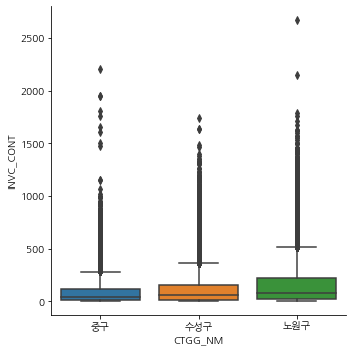

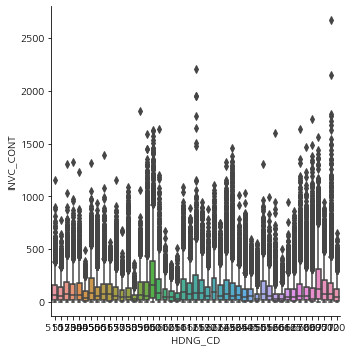

In [18]:
sns.factorplot(x='CTGG_NM', y='INVC_CONT', data=logistics, kind='box')
sns.factorplot(x='HDNG_CD', y='INVC_CONT', data=logistics, kind='box')

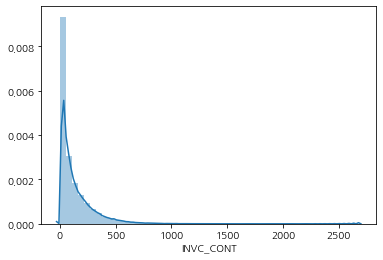

In [113]:
sns.distplot(logistics['INVC_CONT'])
plt.show()

-->  송장 건수의 도별 차이는 육안으로 구분하기 어려우나 미세하게 차이가 남. 노원구, 수성구, 중구 순으로 많음을 알 수 있음. 하지만 동별 송장 건수 차이는 보다 뚜렷함. 송장 건수 자체를 사용한다면 동별 단위로 하는 것이 좋을 듯.  
--> 추가로 알 수 있는 것은 송장 건수가 행정 구역별이든, 전체든 모두가 오른쪽으로 굉장히 치우쳐진 분포를 가진다는 것임. (행정 구역별, 전체) 송장 건수 평균 이상의 건수를 가지는 케이스가 매우 많음. 

- ### 시간별 흐름 시각화

In [25]:
import datetime
from datetime import date

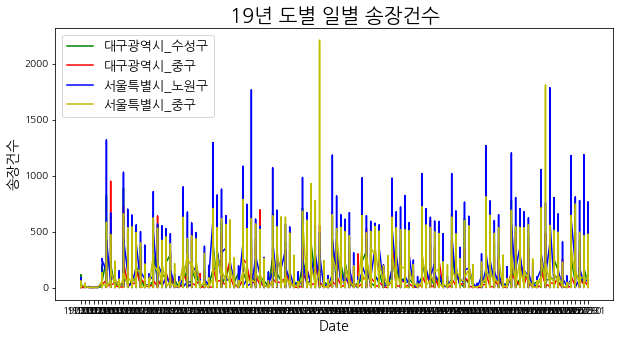

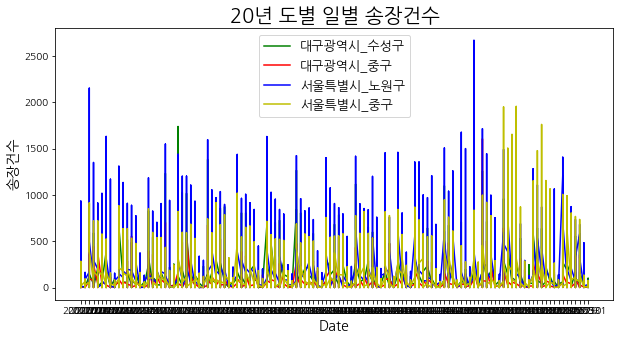

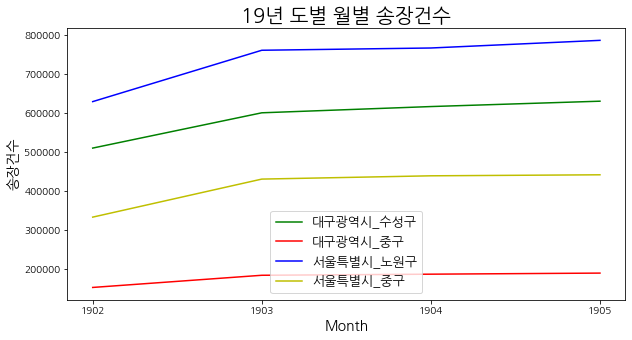

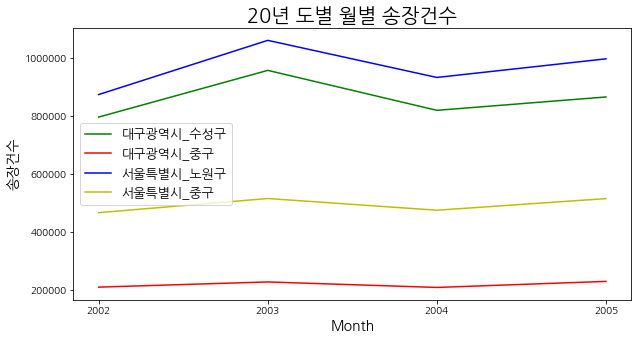

In [60]:
def graph_by_region(df,year,region_index):
    fig = plt.figure(figsize=(10,5))
    colors = ['g','r','b','y']
    tmp_group_region = []
    for i,group_i in enumerate(df[['DL_YMD',region_index, 'INVC_CONT']].groupby([region_index])):
        tmp_group = pd.DataFrame(group_i[1])
        tmp_group.index = tmp_group['DL_YMD']
        plt.plot(tmp_group['INVC_CONT'],color=colors[i]) # matplotlib 에 정의된 색상을 써도 된다. 
        tmp_group_region.append(list(set(tmp_group[region_index]))[0])
        
    plt.title('{}년 도별 일별 송장건수'.format(year), fontsize=20) 
    plt.ylabel('송장건수',fontsize=14)
    plt.xlabel('Date',fontsize=14)
    plt.legend(np.array(tmp_group_region),fontsize=13,loc='best')
    plt.show()
    
graph_by_region(logistics19,'19','SG')
graph_by_region(logistics20,'20','SG')

def graph_by_region2(df,year,region_index):
    fig = plt.figure(figsize=(10,5))
    colors = ['g','r','b','y']
    for i,group_i in enumerate(df[['YM',region_index, 'INVC_CONT']].groupby([region_index])):
        tmp_group = pd.DataFrame(group_i[1])
        monthly_flow = []
        for ym_i in sorted(tmp_group['YM'].unique()):
            month_value = tmp_group[tmp_group['YM'] == ym_i]['INVC_CONT'].sum()
            monthly_flow.append(month_value)
            
        plt.plot(sorted(tmp_group['YM'].unique()),monthly_flow,color=colors[i]) # matplotlib 에 정의된 색상을 써도 된다. 

    plt.title('{}년 도별 월별 송장건수'.format(year), fontsize=20) 
    plt.ylabel('송장건수',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    plt.legend(sorted(df[region_index].unique()),fontsize=13,loc='best')
    plt.show()
    
graph_by_region2(logistics19,'19','SG')
graph_by_region2(logistics20,'20','SG')

--> 도별 일별 송장건수의 흐름은 육안으로 판단하기 어려움.. 다른 시각화가 필요할듯.  
--> 도별 월별 송장건수의 흐름을 보면, 2019년에는 지속적인 증가 양상을 보임. 2020년도 2월, 3월까지 계속 증가한 것으로 예상됨(2019년 6월부터 2020년 1월까지의 데이터가 없으므로 추측 함).  
--> 2020년에 코로나에 대한 공포로 온라인 주문이 늘어나다가 4월에 
--> 그러나 코로나의 영향?(추측 함)으로 인하여 2020년 4월 감소하다가 5월부터 회복세 보임.

### 2. 배송상품  
### 1) 품목별 월별 추이

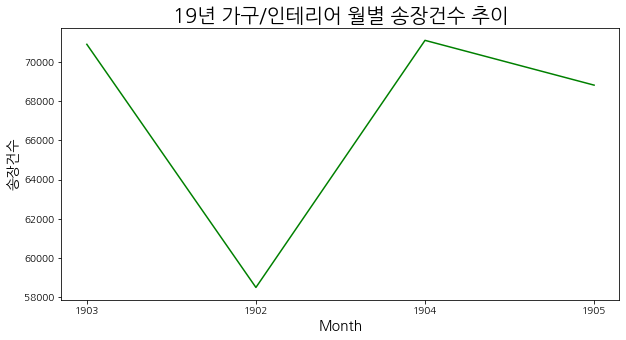

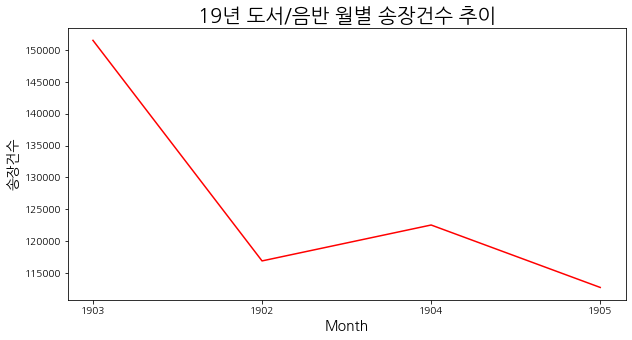

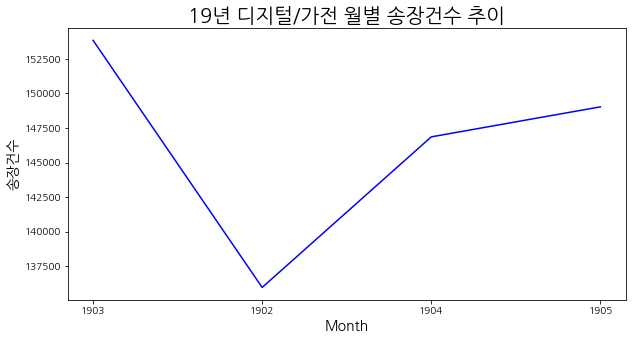

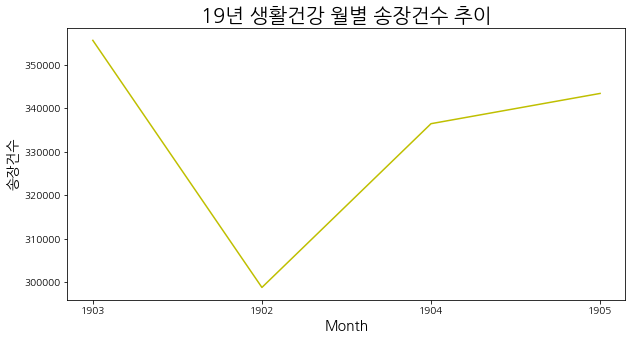

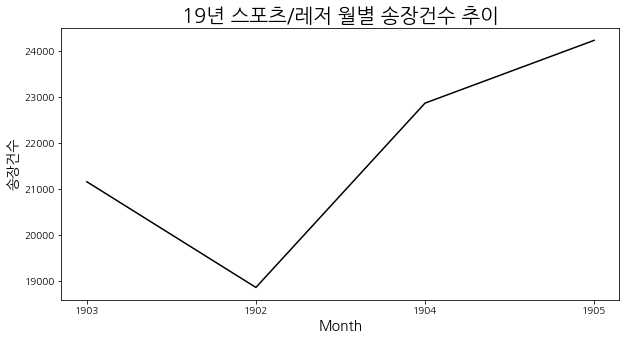

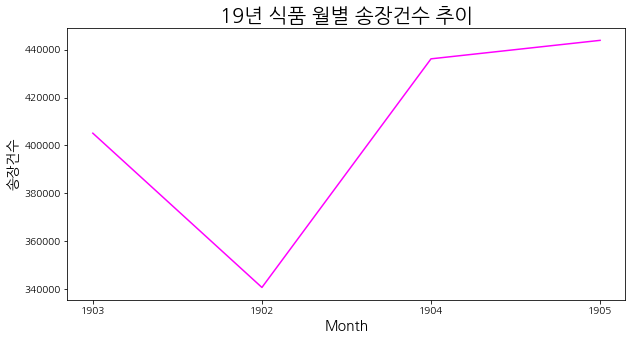

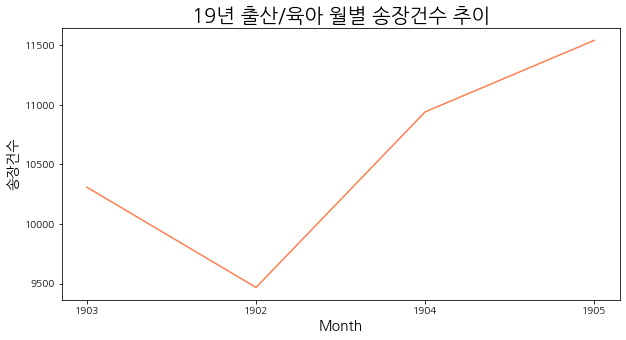

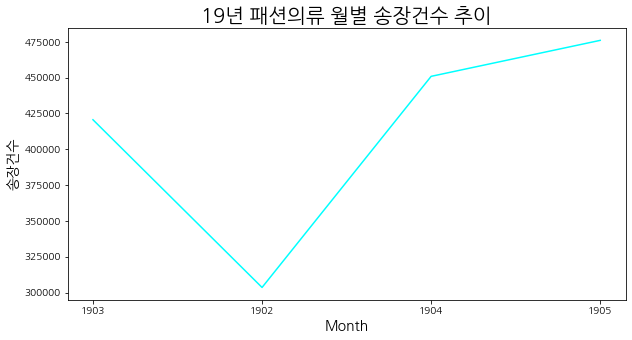

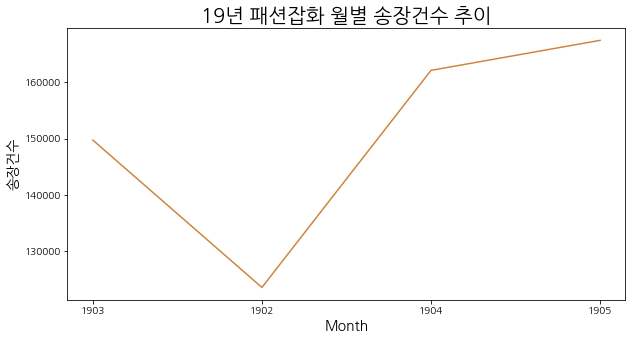

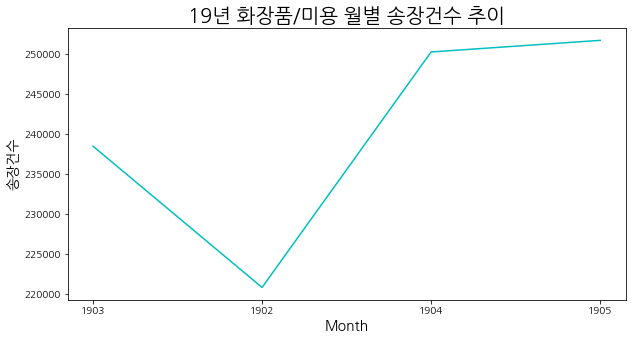

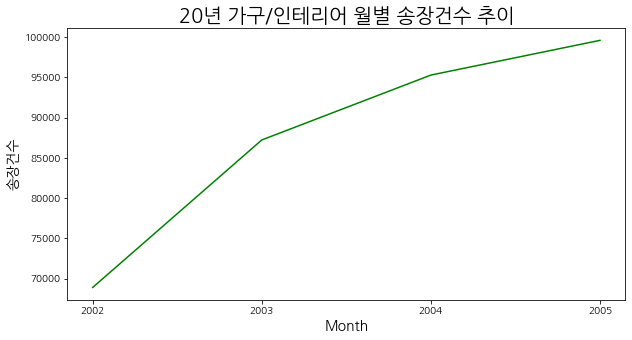

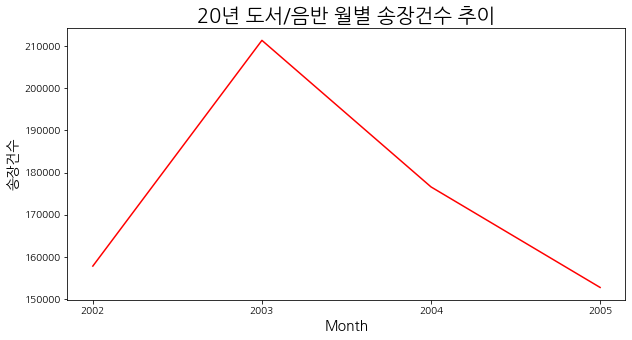

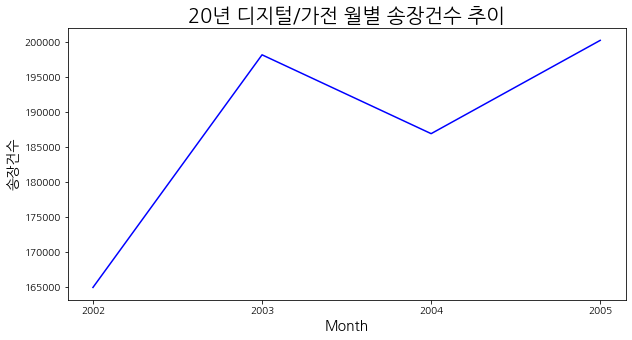

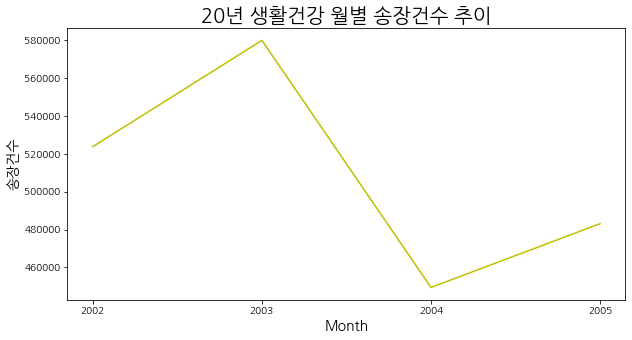

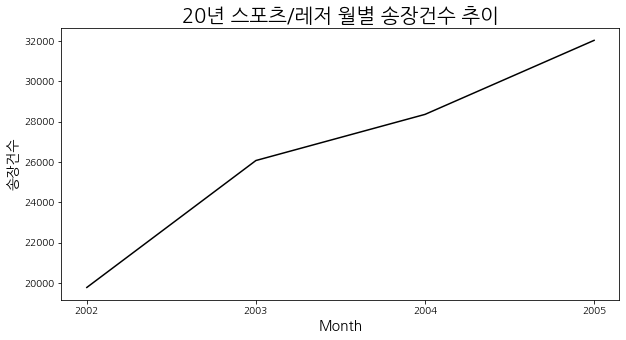

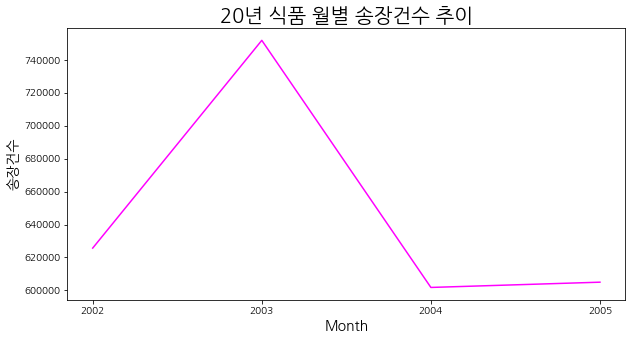

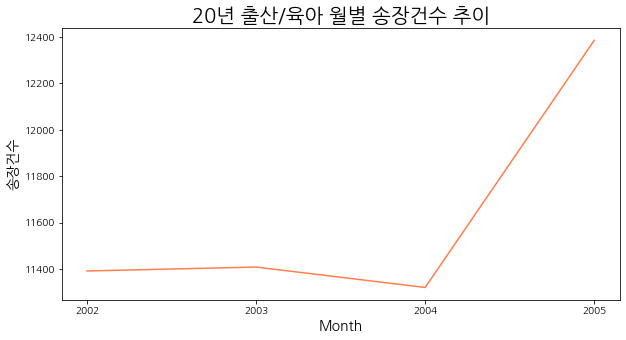

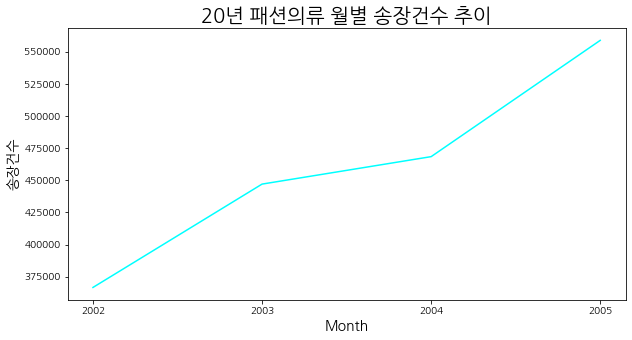

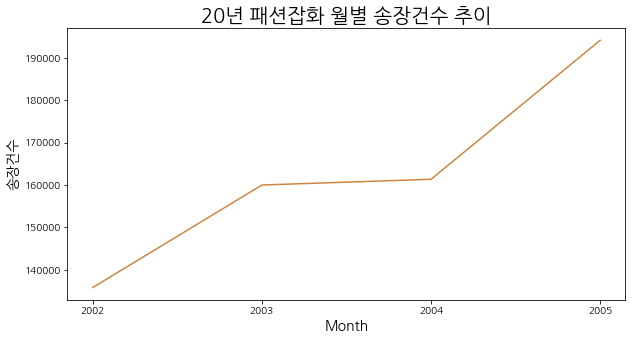

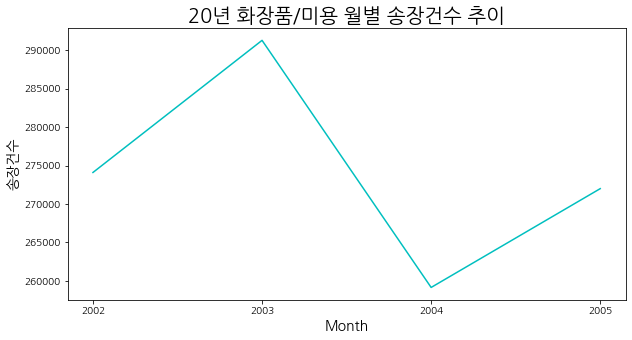

In [296]:
def SUM_by_GD(df,idx_COL, year, aggregated_COL):
    
    for i,group_i in enumerate(df[[aggregated_COL,'YM',idx_COL]].groupby([idx_COL])):
        fig = plt.figure(figsize=(10,5))
        colors = ['g','r','b','y','k','fuchsia','coral','cyan','peru','c']

        tmp_group=pd.DataFrame(group_i[1])
        #print(tmp_group)
        
        unique_ym = sorted(list(set(tmp_group['YM'])))
        unique_gd = sorted(list(tmp_group['DL_GD_LCLS_NM'].unique()))[0]
        monthby_result = []
      
        for ym_i in unique_ym:
            tmp_group_by_ym = tmp_group[tmp_group['YM']==ym_i][aggregated_COL].sum()
            
            monthby_result.append(tmp_group_by_ym)
        
        #print(len(unique_ym),len(monthby_result))
        plt.plot(unique_ym,monthby_result,color=colors[i])       

        plt.title('{}년 {} 월별 송장건수 추이'.format(year, unique_gd), fontsize=20) 
        plt.ylabel('송장건수',fontsize=14)
        plt.xlabel('Month',fontsize=14)
        #plt.legend(unique_ym,fontsize=13,loc='best')
        plt.show()

SUM_by_GD(logistics19,'DL_GD_LCLS_NM','19','INVC_CONT')
SUM_by_GD(logistics20,'DL_GD_LCLS_NM','20','INVC_CONT')

C:\Users\coldp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


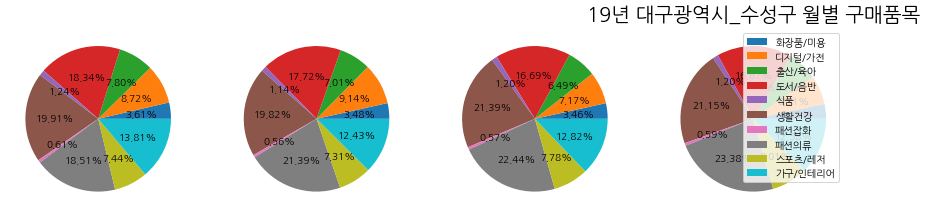

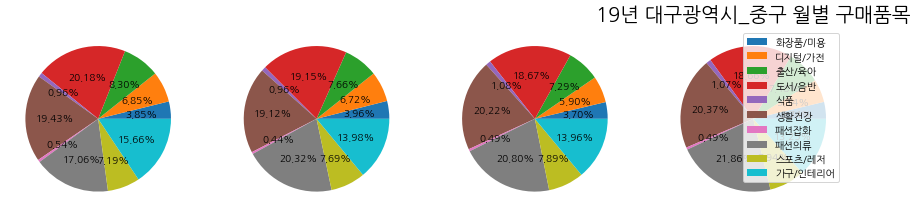

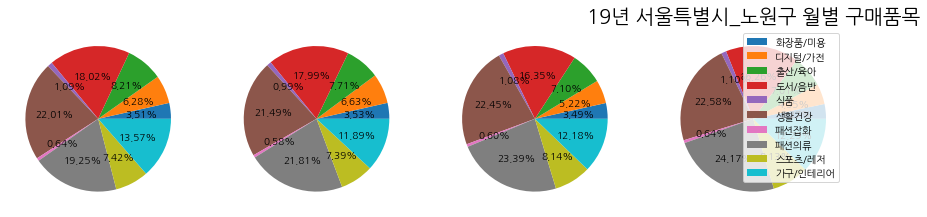

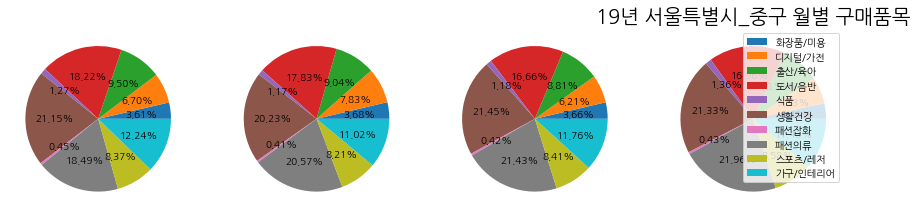

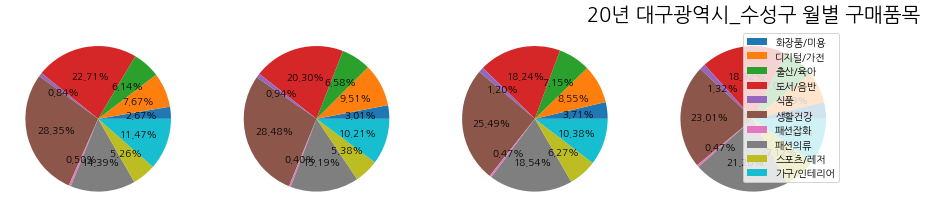

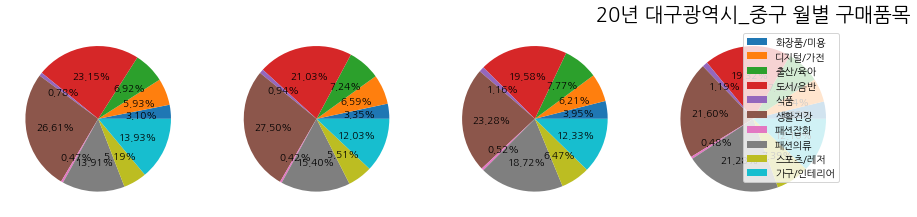

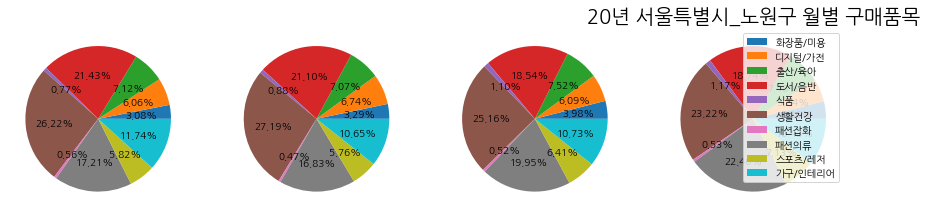

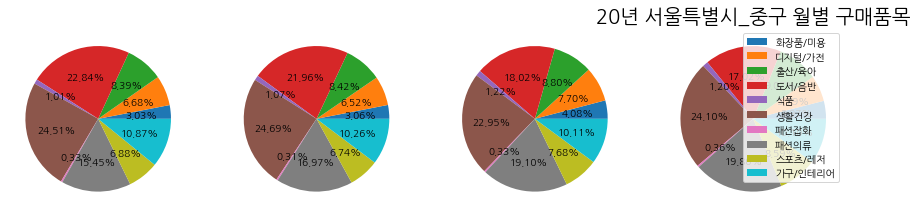

In [167]:
def graph_by_region2(df, year, region_index):
    groupby_time_result = []
    groupby_index = []

    for i,group_i in enumerate(df[['DL_GD_LCLS_NM','YM',region_index, 'INVC_CONT']].groupby([region_index])):
        tmp_group = pd.DataFrame(group_i[1])
        #print(tmp_group)
        tmp_group_sg = sorted(list(set(tmp_group[region_index])))[0]
        
        fig, ax = plt.subplots(1, 4, figsize=(15,5))
        unique_ym = sorted(tmp_group['YM'].unique())
        
        for ym_i in range(len(unique_ym)):
            
            month_value = tmp_group[tmp_group['YM'] == unique_ym[ym_i]][['DL_GD_LCLS_NM','INVC_CONT']].groupby(['DL_GD_LCLS_NM']).sum()
            #print(month_value)
            ax[ym_i].pie(month_value,autopct='%1.2f%%',) # matplotlib 에 정의된 색상을 써도 된다. 

        plt.title('{}년 {} 월별 구매품목'.format(year,tmp_group_sg), fontsize=20) 
        #plt.ylabel('',fontsize=14)
        #plt.xlabel('Month',fontsize=14)
        plt.legend(list(set(logistics['DL_GD_LCLS_NM'])),fontsize=10,loc='best')
        plt.show()
    
graph_by_region2(logistics19,'19','SG')
graph_by_region2(logistics20,'20','SG')

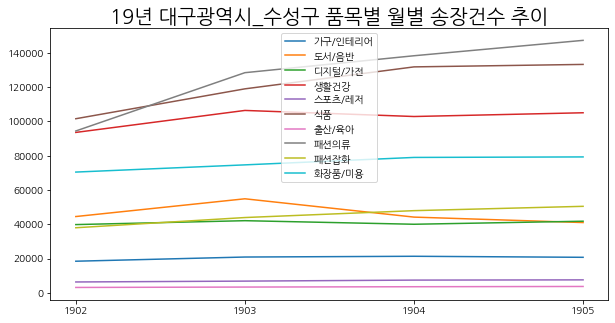

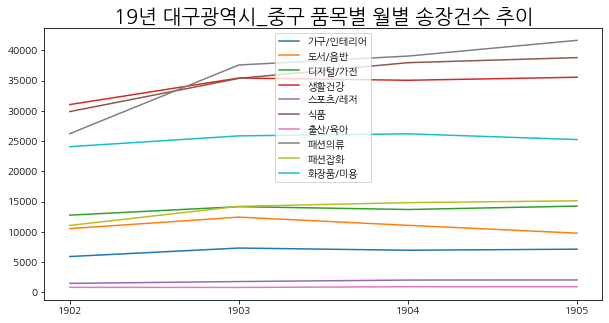

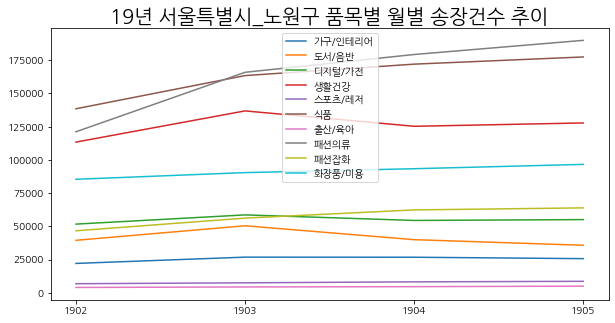

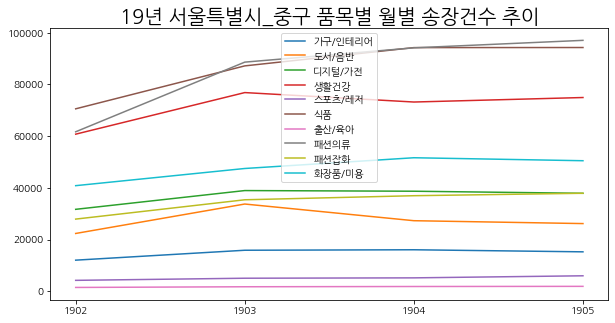

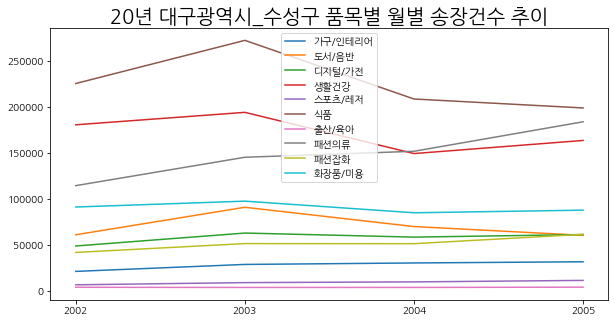

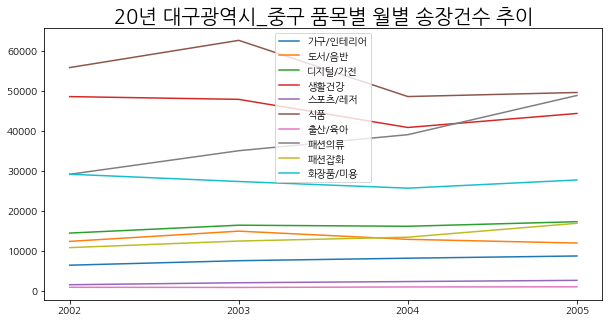

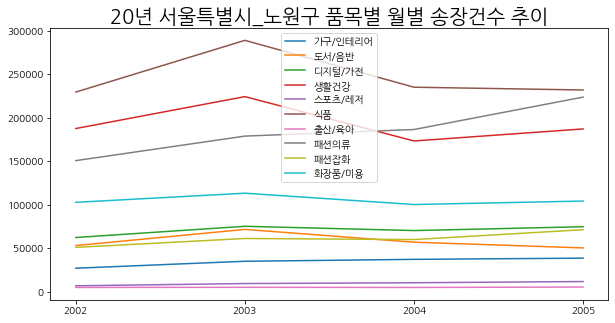

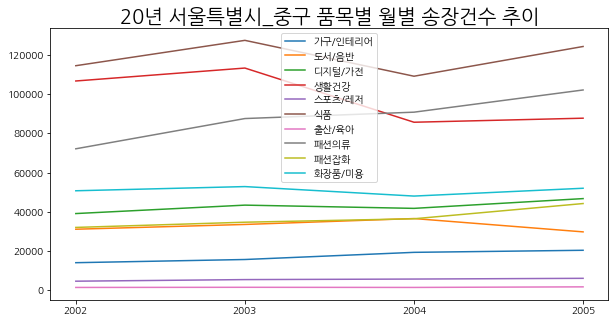

In [55]:
def graph_by_region2(df, year, region_index):
    colors = ['g','r','b','y','k','fuchsia','coral','cyan','peru','c']
    for i,group_i in enumerate(df[['DL_GD_LCLS_NM','YM',region_index, 'INVC_CONT']].groupby([region_index])):
        tmp_group = pd.DataFrame(group_i[1])
        unique_ym = sorted(tmp_group['YM'].unique())
        tmp_group_sg = sorted(tmp_group['SG'].unique())[0]
        
        monthly_flow = pd.DataFrame(np.zeros(len(set(logistics['DL_GD_LCLS_NM'])))).T
        monthly_flow.columns = sorted(list(set(tmp_group['DL_GD_LCLS_NM'])))
        
        fig = plt.figure(figsize=(10,5))
        for ym_i in range(len(unique_ym)):
            month_value = tmp_group[tmp_group['YM'] == unique_ym[ym_i]][['DL_GD_LCLS_NM','INVC_CONT']].groupby(['DL_GD_LCLS_NM']).sum().T
            month_value = pd.DataFrame(month_value)
            month_value.columns = sorted(list(set(tmp_group['DL_GD_LCLS_NM'])))
            monthly_flow = pd.concat([monthly_flow,month_value],axis=0)
        unique_gd = sorted(list(set(logistics['DL_GD_LCLS_NM'])))
        monthly_flow = monthly_flow.iloc[1:,]
        plt.plot(unique_ym,monthly_flow)     
        
        plt.title('{}년 {} 품목별 월별 송장건수 추이'.format(year,tmp_group_sg), fontsize=20) 
        plt.legend(unique_gd,fontsize=10,loc='best')
        plt.show()
    
graph_by_region2(logistics19,'19','SG')
graph_by_region2(logistics20,'20','SG')

      가구/인테리어    도서/음반   디지털/가전      생활건강  스포츠/레저        식품   출산/육아      패션의류  \
1902  18435.0  44519.0  39822.0   93624.0  6321.0  101619.0  3125.0   94468.0   
1903  20880.0  54881.0  42097.0  106456.0  6819.0  119063.0  3351.0  128497.0   
1904  21320.0  44188.0  40015.0  102912.0  7411.0  131882.0  3545.0  138382.0   
1905  20721.0  41006.0  41790.0  105097.0  7551.0  133325.0  3699.0  147369.0   

         패션잡화   화장품/미용  
1902  37971.0  70475.0  
1903  43934.0  74681.0  
1904  47953.0  79025.0  
1905  50481.0  79320.0  


<Figure size 720x360 with 0 Axes>

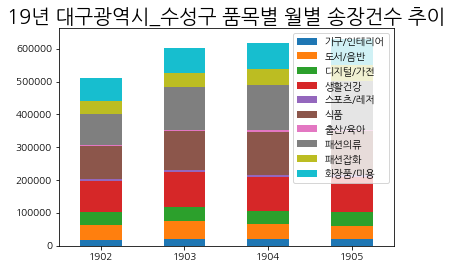

      가구/인테리어    도서/음반   디지털/가전     생활건강  스포츠/레저       식품  출산/육아     패션의류  \
1902   5916.0  10530.0  12758.0  31033.0  1479.0  29872.0  824.0  26226.0   
1903   7318.0  12432.0  14158.0  35419.0  1781.0  35362.0  806.0  37574.0   
1904   6954.0  11071.0  13689.0  35048.0  2025.0  37956.0  923.0  39047.0   
1905   7131.0   9782.0  14250.0  35548.0  2042.0  38793.0  924.0  41645.0   

         패션잡화   화장품/미용  
1902  11061.0  24074.0  
1903  14212.0  25858.0  
1904  14821.0  26198.0  
1905  15125.0  25245.0  


<Figure size 720x360 with 0 Axes>

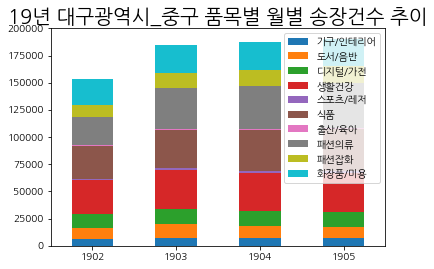

      가구/인테리어    도서/음반   디지털/가전      생활건강  스포츠/레저        식품   출산/육아      패션의류  \
1902  22108.0  39496.0  51685.0  113405.0  6833.0  138496.0  4031.0  121156.0   
1903  26828.0  50440.0  58624.0  136877.0  7510.0  163449.0  4399.0  165924.0   
1904  26767.0  39981.0  54448.0  125297.0  8241.0  172063.0  4623.0  179318.0   
1905  25706.0  35771.0  55087.0  127823.0  8647.0  177476.0  5010.0  189964.0   

         패션잡화   화장품/미용  
1902  46664.0  85416.0  
1903  56204.0  90444.0  
1904  62371.0  93374.0  
1905  63916.0  96638.0  


<Figure size 720x360 with 0 Axes>

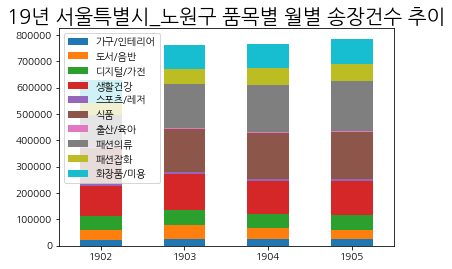

      가구/인테리어    도서/음반   디지털/가전     생활건강  스포츠/레저       식품   출산/육아     패션의류  \
1902  12041.0  22369.0  31708.0  60785.0  4234.0  70588.0  1487.0  61707.0   
1903  15878.0  33757.0  38964.0  76870.0  5054.0  87198.0  1753.0  88651.0   
1904  16065.0  27306.0  38711.0  73217.0  5195.0  94268.0  1851.0  94182.0   
1905  15263.0  26193.0  37907.0  74959.0  5996.0  94302.0  1910.0  97074.0   

         패션잡화   화장품/미용  
1902  27926.0  40860.0  
1903  35402.0  47505.0  
1904  36975.0  51662.0  
1905  37919.0  50509.0  


<Figure size 720x360 with 0 Axes>

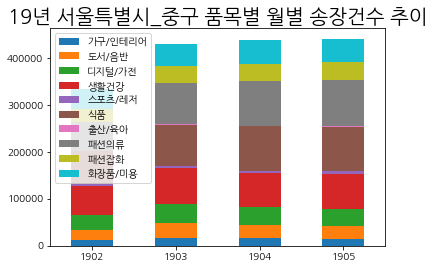

      가구/인테리어    도서/음반   디지털/가전      생활건강   스포츠/레저        식품   출산/육아  \
2002  21294.0  61178.0  48970.0  181013.0   6669.0  225994.0  3984.0   
2003  28870.0  91148.0  63059.0  194564.0   9053.0  273007.0  3796.0   
2004  30470.0  70145.0  58623.0  149663.0   9849.0  209115.0  3820.0   
2005  31769.0  60590.0  61421.0  163940.0  11463.0  199371.0  4107.0   

          패션의류     패션잡화   화장품/미용  
2002  114726.0  41945.0  91422.0  
2003  145628.0  51563.0  97816.0  
2004  152155.0  51468.0  85157.0  
2005  184276.0  61680.0  88002.0  


<Figure size 720x360 with 0 Axes>

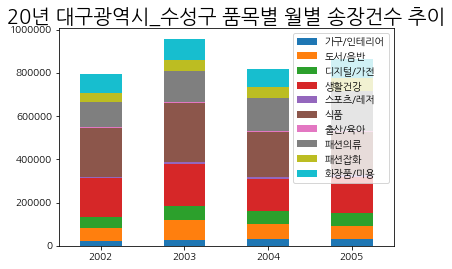

      가구/인테리어    도서/음반   디지털/가전     생활건강  스포츠/레저       식품   출산/육아     패션의류  \
2002   6508.0  12446.0  14521.0  48574.0  1630.0  55821.0   992.0  29185.0   
2003   7628.0  15002.0  16487.0  47889.0  2130.0  62611.0   954.0  35072.0   
2004   8252.0  12961.0  16216.0  40871.0  2426.0  48586.0  1078.0  39078.0   
2005   8805.0  12032.0  17363.0  44369.0  2724.0  49603.0  1112.0  48859.0   

         패션잡화   화장품/미용  
2002  10893.0  29213.0  
2003  12535.0  27392.0  
2004  13500.0  25727.0  
2005  16966.0  27772.0  


<Figure size 720x360 with 0 Axes>

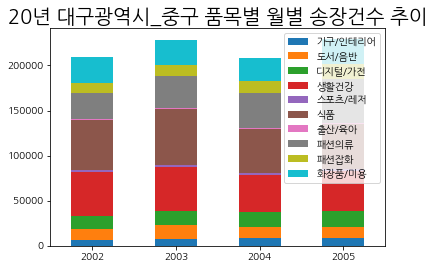

      가구/인테리어    도서/음반   디지털/가전      생활건강   스포츠/레저        식품   출산/육아  \
2002  26957.0  53023.0  62257.0  187501.0   6745.0  229416.0  4868.0   
2003  34959.0  71562.0  75146.0  224168.0   9344.0  288832.0  5036.0   
2004  37146.0  56869.0  70238.0  173210.0  10265.0  234994.0  4869.0   
2005  38553.0  50310.0  74651.0  187049.0  11652.0  231778.0  5319.0   

          패션의류     패션잡화    화장품/미용  
2002  150613.0  50907.0  102682.0  
2003  178794.0  61151.0  113165.0  
2004  186369.0  59882.0  100178.0  
2005  223599.0  71225.0  104160.0  


<Figure size 720x360 with 0 Axes>

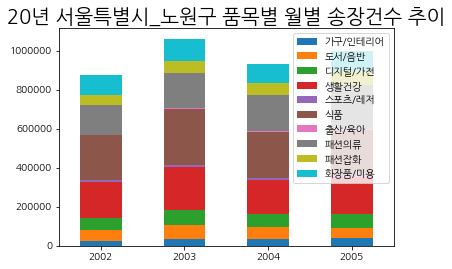

      가구/인테리어    도서/음반   디지털/가전      생활건강  스포츠/레저        식품   출산/육아      패션의류  \
2002  14151.0  31193.0  39170.0  106678.0  4731.0  114461.0  1547.0   72153.0   
2003  15773.0  33624.0  43463.0  113265.0  5544.0  127369.0  1622.0   87553.0   
2004  19419.0  36629.0  41814.0   85675.0  5819.0  109106.0  1553.0   90798.0   
2005  20473.0  29845.0  46786.0   87733.0  6192.0  124245.0  1848.0  102102.0   

         패션잡화   화장품/미용  
2002  32109.0  50776.0  
2003  34768.0  52907.0  
2004  36519.0  48075.0  
2005  44271.0  52056.0  


<Figure size 720x360 with 0 Axes>

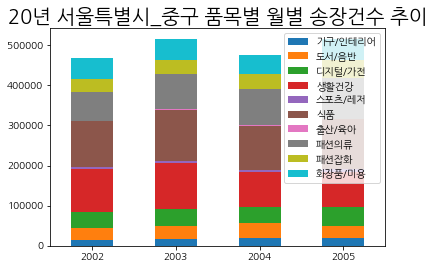

In [54]:
def graph_by_region2(df, year, region_index):
    colors = ['g','r','b','y','k','fuchsia','coral','cyan','peru','c']
    for i,group_i in enumerate(df[['DL_GD_LCLS_NM','YM',region_index, 'INVC_CONT']].groupby([region_index])):
        tmp_group = pd.DataFrame(group_i[1])
        unique_ym = sorted(tmp_group['YM'].unique())
        tmp_group_sg = sorted(tmp_group['SG'].unique())[0]
        
        monthly_flow = pd.DataFrame(np.zeros(len(set(logistics['DL_GD_LCLS_NM'])))).T
        monthly_flow.columns = sorted(list(set(tmp_group['DL_GD_LCLS_NM'])))
        
        fig = plt.figure(figsize=(10,5))
        for ym_i in range(len(unique_ym)):
            month_value = tmp_group[tmp_group['YM'] == unique_ym[ym_i]][['DL_GD_LCLS_NM','INVC_CONT']].groupby(['DL_GD_LCLS_NM']).sum().T
            month_value = pd.DataFrame(month_value)
            month_value.columns = sorted(list(set(tmp_group['DL_GD_LCLS_NM'])))
            monthly_flow = pd.concat([monthly_flow,month_value],axis=0)
        unique_gd = sorted(list(set(logistics['DL_GD_LCLS_NM'])))
        monthly_flow = monthly_flow.iloc[1:,]
        monthly_flow.index = unique_ym

        print(monthly_flow)
        monthly_flow.plot.bar(stacked=True,rot=0)
        plt.title('{}년 {} 품목별 월별 송장건수 추이'.format(year,tmp_group_sg), fontsize=20) 
        plt.legend(unique_gd,fontsize=10,loc='best')
        plt.show()
    
graph_by_region2(logistics19,'19','SG')
graph_by_region2(logistics20,'20','SG')

## 군집

In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [12]:
a= [[1,2,3]]
a.append([2,3,4])
import pandas as pd
a = pd.DataFrame(a)
a.index = ['a','b']
a

,0,1,2
a,1,2,3
b,2,3,4


In [27]:
logistics['SGD'].unique()

array(['서울특별시_중구_동화동', '서울특별시_중구_신당동', '대구광역시_중구_성내1동', '대구광역시_중구_남산2동',
       '대구광역시_수성구_고산3동', '서울특별시_중구_회현동', '대구광역시_수성구_범어1동', '서울특별시_중구_황학동',
       '대구광역시_중구_남산4동', '대구광역시_중구_대신동', '대구광역시_수성구_파동', '대구광역시_수성구_지산2동',
       '대구광역시_수성구_만촌2동', '서울특별시_중구_약수동', '서울특별시_중구_청구동',
       '서울특별시_노원구_상계10동', '서울특별시_노원구_상계8동', '서울특별시_노원구_상계9동',
       '대구광역시_수성구_지산1동', '서울특별시_노원구_월계1동', '대구광역시_중구_대봉2동', '서울특별시_중구_명동',
       '서울특별시_노원구_공릉1동', '서울특별시_노원구_월계3동', '서울특별시_노원구_하계2동',
       '대구광역시_중구_성내2동', '대구광역시_중구_성내3동', '대구광역시_수성구_수성4가동',
       '대구광역시_수성구_범어3동', '대구광역시_중구_삼덕동', '서울특별시_노원구_공릉2동',
       '대구광역시_중구_남산1동', '대구광역시_수성구_만촌3동', '대구광역시_수성구_중동', '대구광역시_중구_동인동',
       '서울특별시_중구_신당제5동', '대구광역시_수성구_고산1동', '서울특별시_중구_을지로동',
       '대구광역시_수성구_상동', '서울특별시_노원구_하계1동', '대구광역시_수성구_범어4동', '서울특별시_중구_소공동',
       '대구광역시_수성구_범어2동', '대구광역시_수성구_범물2동', '서울특별시_노원구_상계6.7동',
       '대구광역시_수성구_수성2.3가동', '서울특별시_노원구_월계2동', '서울특별시_노원구_상계1동',
       '서울특별시_노원구_중계본동', '서울특별시_중구_다산동', '대구광역시_수성구_만촌1동',
       '서

In [35]:
a = [[0,0,0],[1,2,1],[2,2,2]]
pd.DataFrame(a[1:])

,0,1,2
0,1,2,1
1,2,2,2


### 품목별 군집

In [63]:
def CLUSTER_by_GD(df,idx_COL, year, aggregated_COL):
    
    monthly_Result = [[0,0,0,0]]
    for i,group_i in enumerate(df[[aggregated_COL,'YM',idx_COL]].groupby([idx_COL])):

        tmp_group=pd.DataFrame(group_i[1])
        #print(tmp_group)
        
        unique_ym = list(set(tmp_group['YM']))
        unique_gd = list(tmp_group['DL_GD_LCLS_NM'].unique())[0]
        
        monthly_result = []    
        for ym_i in unique_ym:
            tmp_group_by_ym = tmp_group[tmp_group['YM']==ym_i][aggregated_COL].sum()
            
            monthly_result.append(tmp_group_by_ym)
        
        monthly_Result.append(monthly_result)
        #print(monthly_Result)
        
    monthly_Result = pd.DataFrame(monthly_Result[1:])
    print('monthly_Result는:',monthly_Result)
    monthly_Result.index = list(df['DL_GD_LCLS_NM'].unique())
    monthly_Result.columns = unique_ym
    
    return monthly_Result
    
df1_for_cluster = CLUSTER_by_GD(logistics19,'DL_GD_LCLS_NM','19','INVC_CONT')
df2_for_cluster = CLUSTER_by_GD(logistics20,'DL_GD_LCLS_NM','20','INVC_CONT')

monthly_Result는:         0       1       2       3
0   68821   71106   70904   58500
1  112752  122546  151510  116914
2  149034  146863  153843  135973
3  343427  336474  355622  298847
4   24236   22872   21164   18867
5  443896  436169  405072  340575
6   11543   10942   10309    9467
7  476052  450929  420646  303557
8  167441  162120  149752  123622
9  251712  250259  238488  220825
monthly_Result는:         0       1       2       3
0   99600   87230   68910   95287
1  152777  211336  157840  176604
2  200221  198155  164918  186891
3  483091  579886  523766  449419
4   32031   26071   19775   28359
5  604997  751819  625692  601801
6   12386   11408   11391   11320
7  558836  447047  366677  468400
8  194142  160017  135854  161369
9  271990  291280  274093  259137


In [92]:
type(df1_for_cluster.iloc[0,:])

pandas.core.series.Series

In [95]:
pd.DataFrame(pd.Series([0,1,2,3]))

,0
0,0
1,1
2,2
3,3


In [97]:
cos_result = []
cos_index = []
for i in range(len(df2_for_cluster)):
    for j in range(len(df2_for_cluster)):
        tmp = cos_sim(df2_for_cluster.iloc[i,:], df2_for_cluster.iloc[j,:])
        tmp_name = df2_for_cluster.iloc[i,:].name + 'vs' + df2_for_cluster.iloc[j,:].name
        cos_result.append(tmp)
        cos_index.append(tmp_name)
cos_result = pd.DataFrame(cos_result)
cos_result.index = cos_index
cos_result

,0
가구/인테리어vs가구/인테리어,1.000000
가구/인테리어vs도서/음반,0.983540
가구/인테리어vs디지털/가전,0.996895
가구/인테리어vs식품,0.980743
가구/인테리어vs스포츠/레저,0.999135
...,...
출산/육아vs화장품/미용,0.998203
출산/육아vs생활건강,0.998356
출산/육아vs패션잡화,0.987186
출산/육아vs패션의류,0.990623


In [100]:
sorted(np.array(cos_result))

[array([0.97477323]),
 array([0.97477323]),
 array([0.97673415]),
 array([0.97673415]),
 array([0.97747935]),
 array([0.97747935]),
 array([0.97862539]),
 array([0.97862539]),
 array([0.97902076]),
 array([0.97902076]),
 array([0.98060868]),
 array([0.98060868]),
 array([0.98074324]),
 array([0.98074324]),
 array([0.98142198]),
 array([0.98142198]),
 array([0.98353967]),
 array([0.98353967]),
 array([0.98356301]),
 array([0.98356301]),
 array([0.98377062]),
 array([0.98377062]),
 array([0.98451991]),
 array([0.98451991]),
 array([0.98522606]),
 array([0.98522606]),
 array([0.98718573]),
 array([0.98718573]),
 array([0.98815656]),
 array([0.98815656]),
 array([0.98878151]),
 array([0.98878151]),
 array([0.9897429]),
 array([0.9897429]),
 array([0.99062279]),
 array([0.99062279]),
 array([0.99240915]),
 array([0.99240915]),
 array([0.99292119]),
 array([0.99292119]),
 array([0.99303189]),
 array([0.99303189]),
 array([0.99317129]),
 array([0.99317129]),
 array([0.99356435]),
 array([0.99

In [ ]:
def clust_by_region(df,year,region_index):
    fig = plt.figure(figsize=(10,5))
    colors = ['g','r','b','y']
    for i,group_i in enumerate(df[['YM',region_index, 'INVC_CONT']].groupby([region_index])):
        tmp_group = pd.DataFrame(group_i[1])
        monthly_flow = {}
        for ym_i in tmp_group['YM'].unique():
            month_value = tmp_group[tmp_group['YM'] == ym_i]['INVC_CONT'].sum()
            monthly_flow.append(month_value)
        monthly_flow = {'{}년 '}
        
            
        plt.plot(tmp_group['YM'].unique(),monthly_flow,color=colors[i]) # matplotlib 에 정의된 색상을 써도 된다. 

    plt.title('{}년 도별 월별 송장건수'.format(year), fontsize=20) 
    plt.ylabel('송장건수',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    plt.legend(df[region_index].unique(),fontsize=13,loc='best')
    plt.show()
    
graph_by_region2(logistics19,'19','SG')
graph_by_region2(logistics20,'20','SG')